# Importing Packages and Loading the Data

In [18]:
import pandas as pd
import seaborn as sns
#import plotly.plotly as py
#import cufflinks as cf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_excel('/Users/deekshachandraiah/Downloads/CCPP/Folds5x2_pp.xlsx')
data.head()
X = data.iloc[:,0:4]
y = data.iloc[:,4:5]
reg = LinearRegression(normalize=True).fit(X, y)
print('Score for Linear Regression:', reg.score(X, y))
data

Score for Linear Regression: 0.9286960898122536


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


# b(i) Number of rows, columns and what they represent

In [8]:
print('Number of rows:',data.shape[0],'columns:', data.shape[1])
#print(data.shape[0])
print('Columns represent attributes: \nAT(Temperature)\nV(Exhaust Vaccum)\nAP(Ambient Pressure)\nRH(Relative Humidity)\nRows represent the data values of the attributes\nAlso, the data is shuffled in six sheets for having random values as train and test data')

Number of rows: 9568 columns: 5
Columns represent attributes: 
AT(Temperature)
V(Exhaust Vaccum)
AP(Ambient Pressure)
RH(Relative Humidity)
Rows represent the data values of the attributes
Also, the data is shuffled in six sheets for having random values as train and test data


# b(ii) Pairwise Scatter Plots

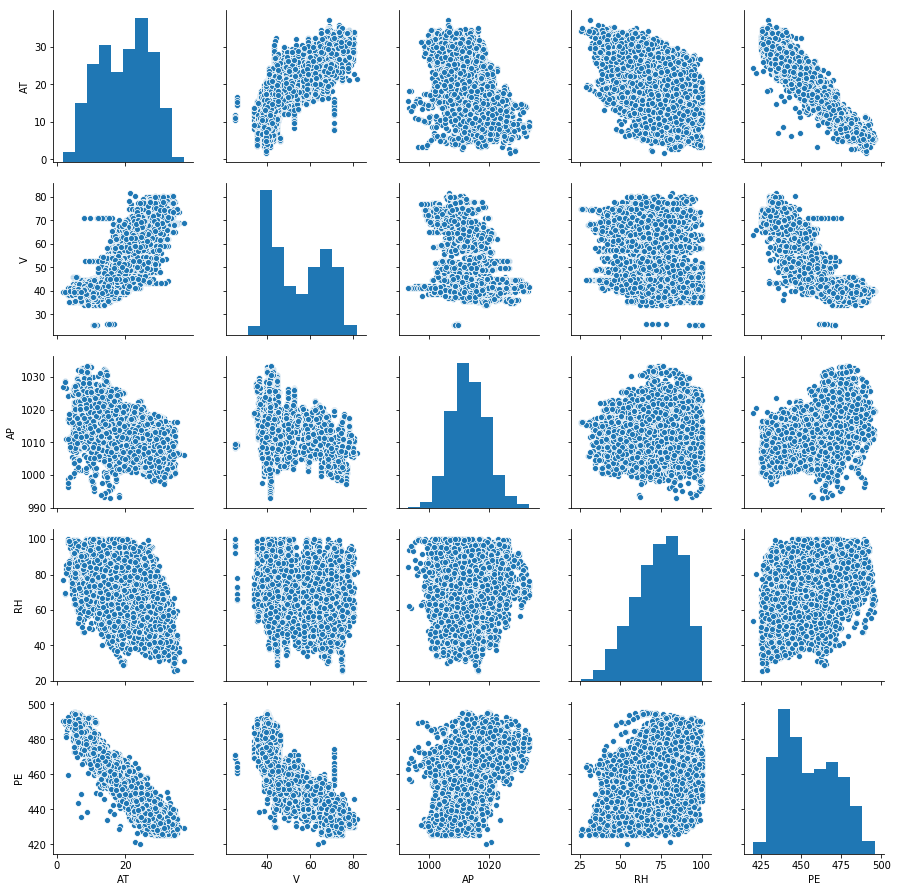

In [16]:
import seaborn as sns
scatterPlot = sns.pairplot(data)

It can be inferred that there is almost a linear relationship between "PE and AT" and "PE and V". Also there is a good statistical relationship between "AT and V". Hence, AT and V are strong features to be considered. 

In [7]:
data.iloc[:,0:4]

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
5,26.27,59.44,1012.23,58.77
6,15.89,43.96,1014.02,75.24
7,9.48,44.71,1019.12,66.43
8,14.64,45.00,1021.78,41.25
9,11.74,43.56,1015.14,70.72


# b(iii) Mean, Median, IQR,Q1,Q2 and Range

In [14]:
print('Mean of each of the attributes :\n',data.mean())

Mean of each of the attributes :
 AT      19.651231
V       54.305804
AP    1013.259078
RH      73.308978
PE     454.365009
dtype: float64


#Mean![image.png](attachment:image.png)

In [16]:
print('Median of each of the attributes :\n',data.median())

Median of each of the attributes :
 AT      20.345
V       52.080
AP    1012.940
RH      74.975
PE     451.550
dtype: float64


#Median![image.png](attachment:image.png)

In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [18]:
print(Q1,'\n',Q3,'\n',IQR)

AT      13.5100
V       41.7400
AP    1009.1000
RH      63.3275
PE     439.7500
Name: 0.25, dtype: float64 
 AT      25.72
V       66.54
AP    1017.26
RH      84.83
PE     468.43
Name: 0.75, dtype: float64 
 AT    12.2100
V     24.8000
AP     8.1600
RH    21.5025
PE    28.6800
dtype: float64


In [19]:
rang = data.max()-data.min()
print('Range:\n',rang)

Range:
 AT    35.30
V     56.20
AP    40.41
RH    74.60
PE    75.50
dtype: float64


#Q1,Q2,IQR and Range ![image.png](attachment:image.png)

# c Linear Regression Model for each Predictor

Score of AT: 0.8989475964148236
Coefficient Value of AT: [[-2.17131996]]
Plot of AT vs PE:


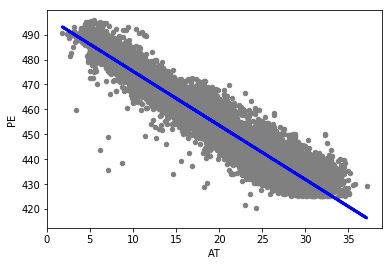

In [19]:
X1 = data.iloc[:,0:1]
# y = 1 * x_0 + 2 * x_1 + 3
y = data.iloc[:,4:5]
reg = LinearRegression(normalize=True).fit(X1, y)
print('Score of AT:',reg.score(X1, y))
y_pred = reg.predict(X1)
data.plot.scatter(x='AT',y='PE',c='grey')
plt.plot(X1,y_pred, color='blue', linewidth=3)
x1_coef=reg.coef_
print('Coefficient Value of AT:',x1_coef)
print('Plot of AT vs PE:')

Score of V: 0.7565177870683979
Coefficient Value of V: [[-1.16813513]]
Plot of V vs PE:


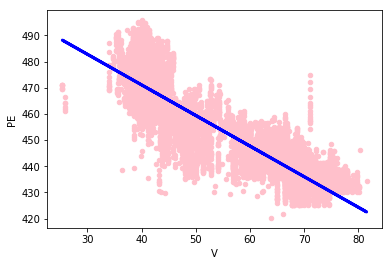

In [20]:
X2 = data.iloc[:,1:2]
# y = 1 * x_0 + 2 * x_1 + 3
y = data.iloc[:,4:5]
reg = LinearRegression(normalize=True).fit(X2, y)
print('Score of V:',reg.score(X2, y))
y_pred = reg.predict(X2)
data.plot.scatter(x='V',y='PE',c='pink')
plt.plot(X2,y_pred, color='blue', linewidth=3)
x2_coef=reg.coef_
print('Coefficient Value of V:',x2_coef)
print('Plot of V vs PE:')

Score of AP: 0.2687686564110674
Coefficient Value of AP: [[1.48987167]]
Plot of AP vs PE:


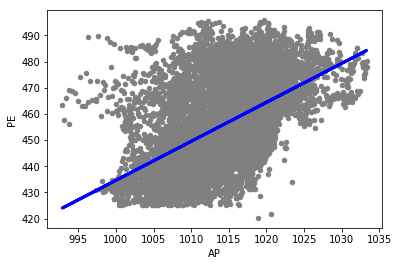

In [21]:
X3 = data.iloc[:,2:3]
# y = 1 * x_0 + 2 * x_1 + 3
y = data.iloc[:,4:5]
reg = LinearRegression(normalize=True).fit(X3, y)
print('Score of AP:',reg.score(X3, y))
y_pred = reg.predict(X3)
data.plot.scatter(x='AP',y='PE',c='grey')
plt.plot(X3,y_pred, color='blue', linewidth=3)
x3_coef=reg.coef_
print('Coefficient Value of AP:',x3_coef)
print('Plot of AP vs PE:')

Score of RH: 0.15193944023117567
Coefficient Value of RH: [[0.4556501]]
Plot of RH vs PE:


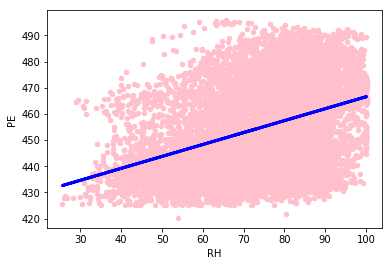

In [22]:
X4 = data.iloc[:,3:4]
# y = 1 * x_0 + 2 * x_1 + 3
y = data.iloc[:,4:5]
reg = LinearRegression(normalize=True).fit(X4, y)
print('Score of RH:',reg.score(X4, y))
y_pred = reg.predict(X4)
data.plot.scatter(x='RH',y='PE',c='pink')
plt.plot(X4,y_pred, color='blue', linewidth=3)
x4_coef = reg.coef_
print('Coefficient Value of RH:',x4_coef)
print('Plot of RH vs PE:')

## From the above plots and score of linear regression model, it can be inferred that there is a statistically significant relationship between AT and PE and V and PE. The highest is for the feature AT and is the most significant feature and second for the feature V.

## Removing Outliers
### Outliers could be removed for feature V as below. V values < 30 and (V<70) & (PE>455) could be removed. The score increases from 0.75651 to 0.762 as shown below. 

Score of V after removing outliers: 0.7624813746832433


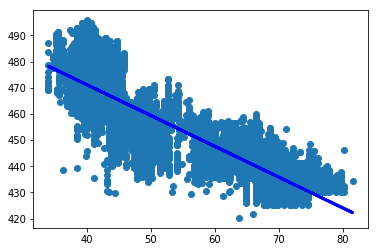

In [109]:
y = data.iloc[:,4:5]
y2 = y
X2 = data.iloc[:,1:2]
rem = (X2['V'] < 30) | ((X2['V'] > 70) & (y2['PE']>455))
y2 = y2.drop(y2.index[rem])
X2 = X2.drop(X2.index[rem])

reg = LinearRegression(normalize=True).fit(X2, y2)
y_pred = reg.predict(X2)
#data.plot.scatter(x='V',y='PE',c='pink')
plt.scatter(X2,y2)
plt.plot(X2,y_pred, color='blue', linewidth=3)
print('Score of V after removing outliers:', reg.score(X2, y2))

### Outliers could be removed for feature AP as below. AP values < 1002 and PE>455 could be removed. The score increases from 0.268 to 0.302 as shown below.  

Score of AP after removing outliers: 0.30279661032148764


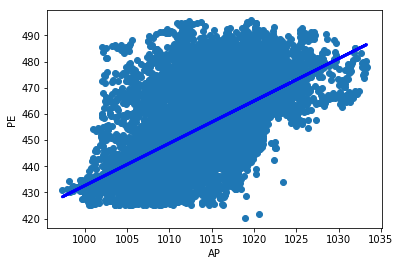

In [296]:
y = data.iloc[:,4:5]
y3 = y
X3 = data.iloc[:,2:3]
rem = (X3['AP'] < 1002) & (y2['PE']>455)
y3 = y3.drop(y3.index[rem])
X3 = X3.drop(X3.index[rem])

reg = LinearRegression(normalize=True).fit(X3, y3)
y_pred = reg.predict(X3)
#data.plot.scatter(x='V',y='PE',c='pink')
plt.scatter(X3,y3)
plt.plot(X3,y_pred, color='blue', linewidth=3)
plt.xlabel('AP')
plt.ylabel('PE')
print('Score of AP after removing outliers:', reg.score(X3, y3))

### Outliers could be removed for feature RH as below. RH values < 40 and PE>455 could be removed. The score increases from 0.1519 to 0.1636 as shown below. 

Score of V after removing outliers: 0.16365151910446307


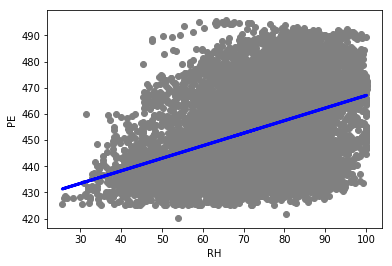

In [297]:
y = data.iloc[:,4:5]
y4 = y
X4 = data.iloc[:,3:4]
aa = (X4['RH'] < 45) & (y4['PE']>460)
y4 = y4.drop(y4.index[aa])
X4 = X4.drop(X4.index[aa])
reg = LinearRegression(normalize=True).fit(X4, y4)
y_pred = reg.predict(X4)
plt.scatter(x=X4,y=y4,c='grey')
plt.plot(X4,y_pred, color='blue', linewidth=3)
plt.xlabel('RH')
plt.ylabel('PE')
print('Score of V after removing outliers:', reg.score(X4, y4))

## Outliers removal using boxplots

Box plot of AT: No Outliers


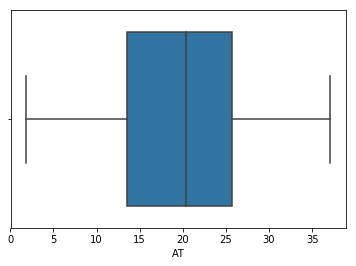

In [79]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
min = Q1 - (IQR*1.5)
max = Q3 + (IQR*1.5)
sns.boxplot(x=data['AT'])
print('Box plot of AT: No Outliers')

Box plot of V: No Outliers


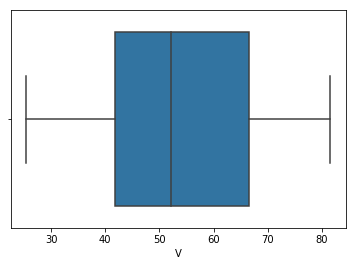

In [78]:
sns.boxplot(x=data['V'])
print('Box plot of V: No Outliers')

Min of AP: 996.8600000000001
Max of AP: 1029.5
Box plot of AP: Outliers present


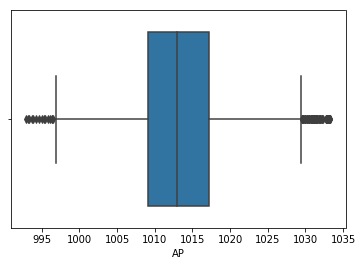

In [80]:
sns.boxplot(x=data['AP'])
print('Min of AP:',min['AP'])
print('Max of AP:',max['AP'])
print('Box plot of AP: Outliers present')

Min of RH: 31.073750000000004
Max of RH: 117.08375
Box plot of RH: Outliers Present


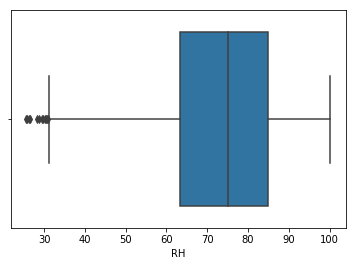

In [81]:
sns.boxplot(x=data['RH'])
print('Min of RH:',min['RH'])
print('Max of RH:',max['RH'])
print('Box plot of RH: Outliers Present')

# d. Multiple Regression

In [163]:
#Multiple Regression
X = data.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
y = data.iloc[:,4:5]
regM = LinearRegression(normalize=True).fit(X, y)
print('Score of Multiple Regression Model:',regM.score(X, y))

Score of Multiple Regression Model: 0.9286960898122536


### Score is maximum for multiple regression when compared to all other models. 

In [164]:
print('Coefficients of AT, V, AP, RH:',regM.coef_)
#Can be removed for 3rd Attribute since it is near to zero

Coefficients of AT, V, AP, RH: [[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]]


In [227]:
import statsmodels.api as sm
X = data.iloc[:,0:4]
y = data.iloc[:,4:5]
X = sm.add_constant(X)
regM2 = sm.OLS(y, X).fit()
print('P-Values:\n',regM2.pvalues)
print('Theta Values:\n',regM2.params)

P-Values:
 const     0.000000e+00
AT        0.000000e+00
V        4.375305e-215
AP        5.507109e-11
RH       3.104584e-293
dtype: float64
Theta Values:
 const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64


## We can reject the Null Hypothesis for all 4 predictors, considering epsilon=0.05. If epsilon is 10**-12, then we can reject the Null Hypothesis for AT<RH<V, but latter one is not considered. Thus, every predictor is significant.

### For predictor AP, we could be reject the Null hypothesis since its coefficient is almost equal to zero.

In [295]:
y_predMul = regM.predict(X)
#plt.scatter(data['AT'], y)
#plt.plot(data['AT'], y_predMul, color='pink', linewidth=3)
#print('Multiple Regression Plot')

# e. Plotting Linear Regression Coefficients with Multiple Regression Coefficients

Multivariate Coefficients: [[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]]
Univariate Coefficients: [[-2.17131996, -1.16813513, 1.48987167, 0.4556501]]


Text(0,0.5,'Multivariate Coefficients')

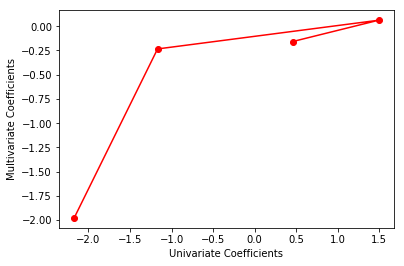

In [174]:
print('Multivariate Coefficients:',regM.coef_)
regL=[[-2.17131996, -1.16813513, 1.48987167, 0.4556501]]
print('Univariate Coefficients:',regL)
plt.plot(regL[0],regM.coef_[0],'ro',linestyle="-")
plt.xlabel('Univariate Coefficients')
plt.ylabel('Multivariate Coefficients')

# f. Non-Linear Association between Predictors and Response

## Score and Plot for AT 

Score for AT: 0.9118826627742725


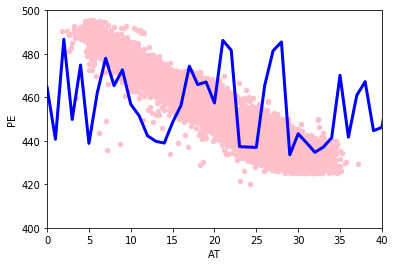

In [294]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
y = data.iloc[:,4:5]
poly = PolynomialFeatures(degree=3, include_bias=True)
x1_new=poly.fit_transform(X1)
reg = LinearRegression(normalize=True).fit(x1_new, y)
print('Score for AT:',reg.score(x1_new, y))
y_pred = reg.predict(x1_new)
data.plot.scatter(x='AT',y='PE',c='pink')
plt.axis([0,40,400,500])
plt.xlabel('AT')
plt.ylabel('PE')
plt.plot(y_pred, color='blue', linewidth=3)

## Score and Plot for V before removing outliers 

Score for V before removing outliers: 0.7750219775589422


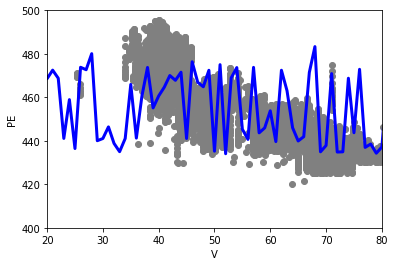

In [291]:
y = data.iloc[:,4:5]
y2 = y
X2 = data.iloc[:,1:2]
poly = PolynomialFeatures(degree=3, include_bias=True)
x2_new=poly.fit_transform(X2)
reg = LinearRegression(normalize=True).fit(x2_new, y2)
y_pred = reg.predict(x2_new)
plt.scatter(X2,y2,c='grey')
plt.axis([20,80,400,500])
plt.plot(y_pred, color='blue', linewidth=3)
plt.xlabel('V')
plt.ylabel('PE')
print('Score for V before removing outliers:', reg.score(x2_new, y2))

## Score for V after removing outliers

Score for V after removing outliers: 0.7857457981976506


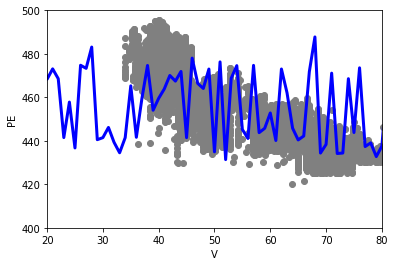

In [290]:
#x2_new=np.hstack([X2,X2**2,X2**3])
y = data.iloc[:,4:5]
y2 = y
X2 = data.iloc[:,1:2]
rem = (X2['V'] < 30) | ((X2['V'] > 70) & (y2['PE']>455))
y2 = y2.drop(y2.index[rem])
X2 = X2.drop(X2.index[rem])
poly = PolynomialFeatures(degree=3, include_bias=True)
x2_new=poly.fit_transform(X2)
reg = LinearRegression(normalize=True).fit(x2_new, y2)
y_pred = reg.predict(x2_new)
plt.scatter(X2,y2,c='grey')
plt.axis([20,80,400,500])
plt.plot(y_pred, color='blue', linewidth=3)
plt.xlabel('V')
plt.ylabel('PE')
print('Score for V after removing outliers:',reg.score(x2_new, y2))

## Score for AP before removing outliers

Score for AP before removing outliers: 0.29754346577897195


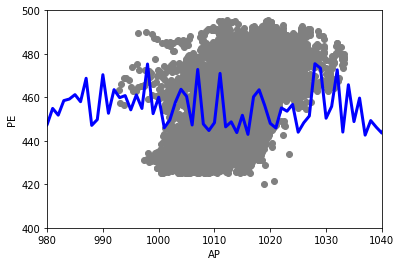

In [289]:
y = data.iloc[:,4:5]
y3 = y
X3 = data.iloc[:,2:3]
poly = PolynomialFeatures(degree=3, include_bias=True)
x3_new=poly.fit_transform(X3)
reg = LinearRegression(normalize=True).fit(x3_new, y3)
y_pred = reg.predict(x3_new)
plt.scatter(X3,y3,c='grey')
plt.axis([980,1040,400,500])
plt.plot(y_pred, color='blue', linewidth=3)
plt.xlabel('AP')
plt.ylabel('PE')
print('Score for AP before removing outliers:',reg.score(x3_new, y3))

## Score for AP after removing outliers

Score for AP after removing outliers: 0.30962433830218816


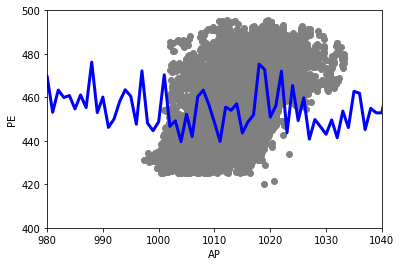

In [288]:
y = data.iloc[:,4:5]
y3 = y
X3 = data.iloc[:,2:3]
rem = (X3['AP'] < 1002) & (y2['PE']>455)
y3 = y3.drop(y3.index[rem])
X3 = X3.drop(X3.index[rem])
poly = PolynomialFeatures(degree=3, include_bias=True)
x3_new=poly.fit_transform(X3)
reg = LinearRegression(normalize=True).fit(x3_new, y3)
y_pred = reg.predict(x3_new)
plt.scatter(X3,y3,c='grey')
plt.axis([980,1040,400,500])
plt.plot(y_pred, color='blue', linewidth=3)
plt.xlabel('AP')
plt.ylabel('PE')
print('Score for AP after removing outliers:',reg.score(x3_new, y3))

[[470.47189559]
 [464.46771275]
 [452.72752396]
 ...
 [453.85982643]
 [455.26030581]
 [460.28117335]]


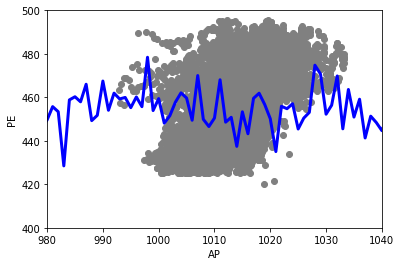

In [287]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
y = data.iloc[:,4:5]
y3 = y
X3 = data.iloc[:,2:3]


poly = PolynomialFeatures(degree=1)
X_ = poly.fit_transform(X3)
#predict_ = poly.fit_transform(predict)

clf = linear_model.LinearRegression()
clf.fit(X_, y3)
print(clf.predict(X_))
plt.scatter(X3,y3,c='grey')
plt.axis([980,1040,400,500])
plt.xlabel('AP')
plt.ylabel('PE')
plt.plot(clf.predict(X_), color='blue', linewidth=3)

## Score and plot for RH before removing outliers 

Score for RH before removing outliers: 0.15374253544345973


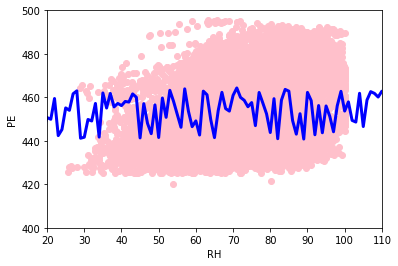

In [286]:
y = data.iloc[:,4:5]
y4 = y
X4 = data.iloc[:,3:4]
poly = PolynomialFeatures(degree=3, include_bias=True)
x4_new=poly.fit_transform(X4)
reg = LinearRegression(normalize=True).fit(x4_new, y4)
y_pred = reg.predict(x4_new)
plt.scatter(X4,y4,c='pink')
plt.plot(y_pred, color='blue', linewidth=3)
plt.axis([20,110,400,500])
plt.xlabel('RH')
plt.ylabel('PE')
print('Score for RH before removing outliers:',reg.score(x4_new, y4))

## Score and plot for RH after removing the outliers

Score for RH after removing outliers: 0.16426981487907533


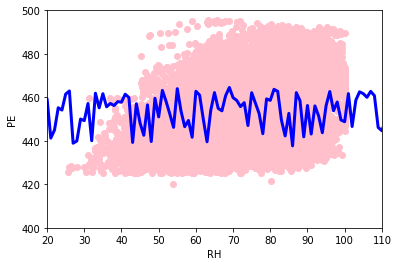

In [285]:
y = data.iloc[:,4:5]
y4 = y
X4 = data.iloc[:,3:4]
aa = (X4['RH'] < 45) & (y4['PE']>460)
y4 = y4.drop(y4.index[aa])
X4 = X4.drop(X4.index[aa])
poly = PolynomialFeatures(degree=3, include_bias=True)
x4_new=poly.fit_transform(X4)
reg = LinearRegression(normalize=True).fit(x4_new, y4)
y_pred = reg.predict(x4_new)
plt.scatter(X4,y4,c='pink')
plt.plot(y_pred, color='blue', linewidth=3)
plt.axis([20,110,400,500])
plt.xlabel('RH')
plt.ylabel('PE')
print('Score for RH after removing outliers:',reg.score(x4_new, y4))

In [207]:
reg.coef_

array([[ 0.00000000e+00, -1.72921131e+00,  3.21451721e-02,
        -1.52187969e-04]])

# g. Association of Interactions of Predictors with the Response

In [221]:
X = data.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
y = data.iloc[:,4:5]
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_int = poly.fit_transform(X)
regInt = LinearRegression(normalize=True).fit(X_int, y)
print('Score of Linear Regression with Interaction Terms:',regInt.score(X_int, y))
reg = LinearRegression(normalize=True).fit(X, y)
print('Score of Linear Regression without Interaction Terms:',reg.score(X, y))

Score of Linear Regression with Interaction Terms: 0.9363057529178327
Score of Linear Regression without Interaction Terms: 0.9286960898122536


In [219]:
print('Coefficients of predictors in the model with interaction terms:\n', reg.coef_)
print('Coefficients of predictors in the model with interaction terms:\n',regInt.coef_)

Coefficients of predictors in the model with interaction terms:
 [[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]]
Coefficients of predictors in the model with interaction terms:
 [[-4.34701412e+00 -7.67485763e+00 -1.52354642e-01  1.57090705e+00
   2.09709231e-02  1.75904518e-03 -5.23035364e-03  6.81235433e-03
   8.38633179e-04 -1.61179894e-03]]


## None of the interaction terms are very much significant compared to the individual variables, but the interaction term AT * V could be considered as the most significant among the rest of the interaction terms.

# h. Improving the model and using train and test data

In [225]:
train, test = train_test_split(data, test_size=0.3, random_state = 0)
print('Train and Test Data:\n')
print(train)
print(test)

Train and Test Data:

         AT      V       AP     RH      PE
4507  15.83  41.67  1013.39  74.12  464.93
287   22.56  62.26  1012.11  63.16  445.33
4018  22.11  59.80  1016.86  70.14  450.62
4624  19.96  56.03  1020.59  64.95  454.67
8507  21.70  70.32  1009.12  91.30  438.52
8249  30.04  67.25  1017.65  52.84  435.17
1830  14.65  39.28  1014.04  77.98  470.41
912   23.72  66.48  1003.61  73.75  436.62
9278  30.01  73.18  1012.23  60.90  429.84
4631  24.27  63.90  1013.50  61.09  450.26
6554  20.74  58.12  1015.43  77.88  449.91
3262  23.24  63.78  1017.10  63.80  446.95
6397  25.95  65.61  1014.36  52.54  443.88
9080  13.70  43.22  1012.01  71.57  463.99
7467   7.16  38.56  1019.17  70.10  486.12
4965  21.60  66.86  1013.02  54.19  450.84
559    9.18  39.42  1025.41  69.46  473.78
138   25.45  57.32  1011.70  47.09  441.30
8419  10.02  39.66  1016.34  79.98  480.05
1687  29.22  72.39  1000.87  77.39  430.24
2078   8.66  41.01  1022.51  98.55  472.16
3861  31.48  69.75  1008.90  45.

## Improving the model

In [260]:
X = data.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
y = data.iloc[:,4:5]
regIm = LinearRegression(normalize=True).fit(X, y)
params = np.append(regIm.intercept_,regIm.coef_)
predictions = regIm.predict(X)
MSE = (y-predictions)**2
MSEorig = sum(MSE['PE'])/len(MSE['PE'])
print(MSEorig)
print(regIm.score(X,y))

20.767397532534915
0.9286960898122536


### Normal Model

In [226]:
X = train.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
y = train.iloc[:,4:5]
testX = test.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
testy = test.iloc[:,4:5]
regIm = LinearRegression(normalize=True).fit(X, y)
params = np.append(regIm.intercept_,regIm.coef_)
predictions = regIm.predict(X)
MSE = (y-predictions)**2
MSEorig = sum(MSE['PE'])/len(MSE['PE'])
print('Train MSE for Normal Model:',MSEorig)
print('Train score for Normal Model:',regIm.score(X,y))

regIm = LinearRegression(normalize=True).fit(testX, testy)
params = np.append(regIm.intercept_,regIm.coef_)
predictions = regIm.predict(testX)
MSE = (testy-predictions)**2
MSEorig = sum(MSE['PE'])/len(MSE['PE'])
print('Test MSE for Normal Model:', MSEorig)
print('Test score for Normal Model:',regIm.score(testX,testy))

Train MSE for Normal Model: 20.941563616739664
Train score for Normal Model: 0.9279441090358653
Test MSE for Normal Model: 20.344596549696696
Test score for Normal Model: 0.9304924826027657


### Model without train and test data

In [262]:
X = data.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
y = data.iloc[:,4:5]
poly = PolynomialFeatures(degree=3,interaction_only=True,include_bias = False)
X_int = poly.fit_transform(X)
regImp = LinearRegression(normalize=True).fit(X_int, y)
params = np.append(regImp.intercept_,regImp.coef_)
predictions = regImp.predict(X_int)
MSE = (y-predictions)**2
MSEorig = sum(MSE['PE'])/len(MSE['PE'])
print(MSEorig)
print(regImp.score(X_int,y))

18.199325847554476
0.9375134465607182


### Model with all predictors, interaction terms and quadratic polynomials 

In [251]:
X = train.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
y = train.iloc[:,4:5]
testX = test.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
testy = test.iloc[:,4:5]
poly = PolynomialFeatures(degree=3,interaction_only=True,include_bias = False)
X_int = poly.fit_transform(X)
regImp = LinearRegression(normalize=True).fit(X_int, y)
params = np.append(regImp.intercept_,regImp.coef_)
predictions = regImp.predict(X_int)
MSE = (y-predictions)**2
MSEorig = sum(MSE['PE'])/len(MSE['PE'])
print('Train MSE with all variables, interaction terms and polynomials:',MSEorig)
print('Train score with all predictors, interaction terms and polynomials:',regImp.score(X_int,y))

X_int = poly.transform(testX)
regImp = LinearRegression(normalize=True).fit(X_int, testy)
params = np.append(regImp.intercept_,regImp.coef_)
predictions = regImp.predict(X_int)
MSE = (testy-predictions)**2
MSEorig = sum(MSE['PE'])/len(MSE['PE'])
print('Test MSE with all variables, interaction terms and polynomials:',MSEorig)
print('Test score with all predictors, interaction terms and polynomials:',regImp.score(X_int,testy))

Train MSE with all variables, interaction terms and polynomials: 18.46959381319541
Train score with all predictors, interaction terms and polynomials: 0.9364496814893203
Test MSE with all variables, interaction terms and polynomials: 17.499739180477782
Test score with all predictors, interaction terms and polynomials: 0.940211966230795


### OLS Model

In [247]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = train.iloc[:,0:4]
y = train.iloc[:,4:5]
testX = test.iloc[:,0:4]
testy = test.iloc[:,4:5]
poly = PolynomialFeatures(degree=3,interaction_only=True,include_bias = False)
X_int = poly.fit_transform(X)
regM2 = smf.ols(formula='y ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=X).fit()
#print the coefficients
regM2.params
regM2.summary()
#regM2.pvalues
#print('P-Values:\n',regM2.pvalues)
#print('Theta Values:\n',regM2.params)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     9682.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:35:22   Log-Likelihood:                -19322.
No. Observations:                6697   AIC:                         3.867e+04
Df Residuals:                    6686   BIC:                         3.874e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    712.9146     96.523      7.386      0.000     523.698     902.131
AT            -4.3915      2.879     -1.525      0.127     -10.035       1.252
V             -7.4827      1.631     -4.588      0.000     -10.680      -4.285
AP            -0.1802      0.094     -1.911      0.056      -0.365       0.005
RH             0.9984      0.944      1.058      0.290      -0.852       2.849
AT:V           0.0205      0.001     18.922      0.000       0.018       0.023
AT:AP          0.0018      0.003      0.650      0.516      -0.004       0.007
AT:RH         -0.0053      0.001     -5.383      0.000      -0.007      -0.003
V:AP           0.0066      0.002      4.142      0.000       0.003       0.010
V:RH           0.0008      0.001      1.300      0.194      -0.000       0.002
AP:RH         -0.0010      0.001     -1.123      0.261      -0.003       0.001
==============================================================================
Omnibus:                     1279.310   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10087.737
Skew:                          -0.696   Prob(JB):                         0.00
Kurtosis:                       8.849   Cond. No.                     1.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Based on the p-values in the table, the p-values are high for AT:AP, V:RH, AP:RH and hence can be dropped.  

### After removing interaction terms using p values. Note that the Std error in the summary table has reduced after removing the features.

In [252]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = train.iloc[:,0:4]
y = train.iloc[:,4:5]
testX = test.iloc[:,0:4]
testy = test.iloc[:,4:5]
poly = PolynomialFeatures(degree=3,interaction_only=True,include_bias = False)
X_int = poly.fit_transform(X)
regM2 = smf.ols(formula='y ~ AT + V + AP + RH + AT*V +  AT*RH + V*AP ', data=X).fit()
#print the coefficients
regM2.params
regM2.summary()
#regM2.pvalues
#print('P-Values:\n',regM2.pvalues)
#print('Theta Values:\n',regM2.params)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.383e+04
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:54:50   Log-Likelihood:                -19324.
No. Observations:                6697   AIC:                         3.866e+04
Df Residuals:                    6689   BIC:                         3.872e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    822.6015     47.437     17.341      0.000     729.610     915.593
AT            -2.6208      0.080    -32.777      0.000      -2.778      -2.464
V             -8.6301      0.926     -9.318      0.000     -10.446      -6.814
AP            -0.2896      0.046     -6.272      0.000      -0.380      -0.199
RH            -0.0429      0.013     -3.345      0.001      -0.068      -0.018
AT:V           0.0202      0.001     19.991      0.000       0.018       0.022
AT:RH         -0.0039      0.001     -6.672      0.000      -0.005      -0.003
V:AP           0.0078      0.001      8.663      0.000       0.006       0.010
==============================================================================
Omnibus:                     1274.404   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10018.365
Skew:                          -0.694   Prob(JB):                         0.00
Kurtosis:                       8.829   Cond. No.                     5.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# i. KNN Raw Features

In [280]:
from sklearn.neighbors import KNeighborsRegressor
X = train.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
y = train.iloc[:,4:5]
testX = test.iloc[:,0:4]
# y = 1 * x_0 + 2 * x_1 + 3
testy = test.iloc[:,4:5]

K=1;
trainError = [];
testError = [];

while(K<100):
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X, y) 
    #print(X.shape)
    trainError.append(1-knn.score(X,y));
    testError.append(1-knn.score(testX,testy));
    K=K+1; 

K for train: 1 
K for test: 5
Train Error: 0.0 
Test Error 0.053514521920925096
Train Score: 1.0 
Test Error 0.9464854780790749


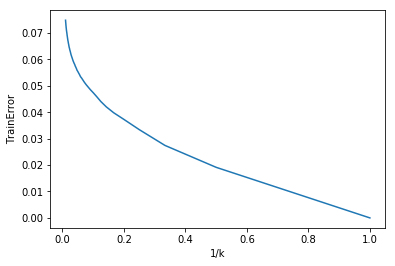

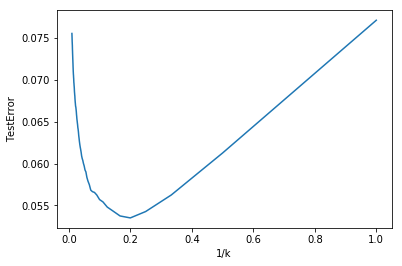

In [281]:
ktrain = (trainError.index(np.min(trainError))+1)
ktest = (testError.index(np.min(testError))+1)
print('K for train:',ktrain,'\nK for test:',ktest)
plt.xlabel('1/k')
plt.ylabel('TrainError')
plt.plot([(1/(x+1)) for x in range(len(trainError))],trainError)
plt.figure()
plt.xlabel('1/k')
plt.ylabel('TestError')
plt.plot([(1/(x+1)) for x in range(len(testError))],testError)

print('Train Error:',np.min(trainError),'\nTest Error',np.min(testError))
print('Train Score:',1-np.min(trainError),'\nTest Error',1-np.min(testError))

### Hence Optimal K is 5 

# (J) KNN is better than Linear Regression Model since it has the highest score(0.9464854780790749) and least error(0.053514521920925096).